# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

-----------

# **Data Inspecting**

In [2]:
info_df = pd.read_csv('info_base_games.csv')
gamalytic_df = pd.read_csv('gamalytic_steam_games.csv')
dlcs_df = pd.read_csv('dlcs.csv')
demos_df = pd.read_csv('demos.csv')

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\1388265767.py:1: DtypeWarning: Columns (0,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  info_df = pd.read_csv('info_base_games.csv')


In [3]:
info_df.head()

,appid,name,metacritic,steam_achievements,steam_trading_cards,workshop_support,genres,achievements_total,release_date,supported_platforms
0,2574000,Femboy Burgers,NaN,True,True,True,"Casual, Indie",NaN,"Oct 9, 2023","['windows', 'mac', 'linux']"
1,2574120,PPA Pickleball Tour 2025,NaN,True,True,True,"Indie, Simulation, Sports",18,"Jul 16, 2024","['windows', 'mac', 'linux']"
2,2573200,Squeaky Squad,NaN,True,True,True,"Action, Adventure, Indie",27,"Mar 29, 2024","['windows', 'mac', 'linux']"
3,2573440,Paradox Metal,NaN,True,True,True,"Action, Early Access",NaN,Coming soon,"['windows', 'mac', 'linux']"
4,2569520,Naturpark Lillebælt VR,NaN,True,True,True,"Action, Adventure",NaN,"Sep 18, 2023","['windows', 'mac', 'linux']"


In [4]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99167 entries, 0 to 99166
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   appid                99167 non-null  object
 1   name                 99149 non-null  object
 2   metacritic           3019 non-null   object
 3   steam_achievements   99167 non-null  bool  
 4   steam_trading_cards  99167 non-null  bool  
 5   workshop_support     99167 non-null  bool  
 6   genres               94389 non-null  object
 7   achievements_total   38115 non-null  object
 8   release_date         98861 non-null  object
 9   supported_platforms  99167 non-null  object
dtypes: bool(3), object(7)
memory usage: 5.6+ MB


In [5]:
info_df['release_date'].value_counts().head(30)

release_date
Coming soon        12109
To be announced     5872
2025                2699
Q1 2025              753
Q2 2025              626
Mar-25               258
Q4 2025              233
Q3 2025              219
2026                 160
Feb-25               149
Dec 5, 2024          148
Nov 15, 2024         142
Oct 31, 2024         141
Dec 13, 2024         137
Oct 24, 2024         135
Apr-25               131
Aug 1, 2024          129
Jan 31, 2025         126
Nov 22, 2024         122
Dec 12, 2024         119
Nov 14, 2024         118
Nov 8, 2024          115
Dec 6, 2024          114
Jan 30, 2025         112
Oct 22, 2024         111
Oct 28, 2024         111
Nov 7, 2024          110
Nov 6, 2024          108
Oct 25, 2024         106
Aug 30, 2024         106
Name: count, dtype: int64

In [6]:
gamalytic_df.head()

,steamId,price,copiesSold,publisherClass,reviewScore,aiContent
0,730,0.0,302158048,AAA,87,NaN
1,570,0.0,212896574,AAA,82,NaN
2,578080,0.0,161971233,AAA,59,NaN
3,440,0.0,99060457,AAA,90,NaN
4,1172470,0.0,67554185,AAA,67,NaN


In [7]:
gamalytic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93338 entries, 0 to 93337
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   steamId         93338 non-null  int64  
 1   price           93338 non-null  float64
 2   copiesSold      93338 non-null  int64  
 3   publisherClass  93338 non-null  object 
 4   reviewScore     93338 non-null  int64  
 5   aiContent       0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.3+ MB


In [8]:
dlcs_df.head()

,base_appid,dlc_appid,name
0,1786750,2568660,家出王女 - 全年齢版ストーリー&グラフィック追加 DLC
1,1981700,2563730,Jacob's Quest - Voyage
2,2009450,2552980,Invector: Rhythm Galaxy - Latin Power Song Pack
3,1133420,2550750,Hero or Villain: Genesis — Supercharged!
4,2533950,2551000,Hot And Lovely ：Uniform - adult patch


In [9]:
dlcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   base_appid  5445 non-null   object
 1   dlc_appid   5445 non-null   object
 2   name        5445 non-null   object
dtypes: object(3)
memory usage: 127.7+ KB


In [10]:
demos_df.head()

,Unnamed: 0,full_game_appid,demo_appid,name
0,0,2214650,2573370,Rolando Deluxe Demo
1,1,1439980,2573460,Outrunner: Neon Nights Demo
2,2,2412240,2572840,Bubble Ghost Remake Demo
3,3,2448830,2572240,Time Handlers Demo
4,4,2379590,2570800,Hope's Final Defense Demo


In [11]:
demos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15449 entries, 0 to 15448
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       15449 non-null  int64 
 1   full_game_appid  15449 non-null  object
 2   demo_appid       15449 non-null  object
 3   name             15448 non-null  object
dtypes: int64(1), object(3)
memory usage: 482.9+ KB


----------------

# **Data Wrangling**

### *Renaming columns to have a common 'id' column for merging*

In [12]:
info_df.rename(columns={'appid': 'id'}, inplace=True)
gamalytic_df.rename(columns={'steamId': 'id'}, inplace=True)
dlcs_df.rename(columns={'base_appid': 'id'}, inplace=True)
demos_df.rename(columns={'full_game_appid': 'id'}, inplace=True)

### *Ensure consistent ID types*

In [13]:

info_df['id'] = info_df['id'].astype(str)
gamalytic_df['id'] = gamalytic_df['id'].astype(str)
dlcs_df['id'] = dlcs_df['id'].astype(str)
demos_df['id'] = demos_df['id'].astype(str)

### **Data Merging**

In [14]:
# Merge info_df and gamalytic_df
merged_df = pd.merge(info_df, gamalytic_df, on='id', how='inner')

# Aggregate DLCs (count per game)
dlc_count = dlcs_df.groupby('id').size().reset_index(name='dlc_count')

merged_df = pd.merge(merged_df, dlc_count, on='id', how='left')
merged_df['dlc_count'] = merged_df['dlc_count'].fillna(0)

# Add demo presence
merged_df['hasDemo'] = merged_df['id'].isin(demos_df['id']).astype(int)

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69428 entries, 0 to 69427
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   69428 non-null  object 
 1   name                 69428 non-null  object 
 2   metacritic           2933 non-null   object 
 3   steam_achievements   69428 non-null  bool   
 4   steam_trading_cards  69428 non-null  bool   
 5   workshop_support     69428 non-null  bool   
 6   genres               69324 non-null  object 
 7   achievements_total   37295 non-null  object 
 8   release_date         69426 non-null  object 
 9   supported_platforms  69428 non-null  object 
 10  price                69428 non-null  float64
 11  copiesSold           69428 non-null  int64  
 12  publisherClass       69428 non-null  object 
 13  reviewScore          69428 non-null  int64  
 14  aiContent            0 non-null      float64
 15  dlc_count            69428 non-null 

In [16]:
merged_df.isnull().sum()

id                         0
name                       0
metacritic             66495
steam_achievements         0
steam_trading_cards        0
workshop_support           0
genres                   104
achievements_total     32133
release_date               2
supported_platforms        0
price                      0
copiesSold                 0
publisherClass             0
reviewScore                0
aiContent              69428
dlc_count                  0
hasDemo                    0
dtype: int64

In [17]:
# merged_df.to_csv('final_merged_data.csv', index=False)

In [18]:
df = merged_df.copy()

### *Handle missing values*

In [19]:
df['metacritic'] = pd.to_numeric(df['metacritic'], errors='coerce').fillna(0)
df['achievements_total'] = pd.to_numeric(df['achievements_total'], errors='coerce').fillna(0)
df['genres'] = df['genres'].fillna('Unknown')
df['release_date'] = df['release_date'].replace('Coming soon', pd.NA)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year.fillna(df['release_date'].dt.year.mode()[0])

In [20]:
# Drop aiContent if all NaN
df.drop(columns=['aiContent'], inplace=True)

In [21]:
df.isnull().sum()

id                        0
name                      0
metacritic                0
steam_achievements        0
steam_trading_cards       0
workshop_support          0
genres                    0
achievements_total        0
release_date           1223
supported_platforms       0
price                     0
copiesSold                0
publisherClass            0
reviewScore               0
dlc_count                 0
hasDemo                   0
release_year              0
dtype: int64

In [22]:
df['release_year'].value_counts()

release_year
2024.0    17492
2021.0     9089
2023.0     8174
2018.0     6265
2022.0     5979
2019.0     5852
2020.0     5507
2017.0     3836
2025.0     2631
2014.0     1441
2015.0     1080
2013.0      438
2016.0      357
2012.0      299
2009.0      264
2011.0      228
2010.0      194
2008.0      142
2007.0       78
2006.0       59
2005.0        6
2003.0        3
2001.0        3
2004.0        3
1997.0        2
2000.0        2
1999.0        2
2002.0        1
1998.0        1
Name: count, dtype: int64

In [23]:
df['publisherClass'].value_counts()

publisherClass
Hobbyist    39623
Indie       26834
AA           2166
AAA           805
Name: count, dtype: int64

# **Data Preprocessing** 

## ***Encoding & Feature Engineering***

In [24]:
# Encode categorical variables
df['steam_achievements'] = df['steam_achievements'].astype(int)
df['steam_trading_cards'] = df['steam_trading_cards'].astype(int)
df['workshop_support'] = df['workshop_support'].astype(int)
df = pd.get_dummies(df, columns=['publisherClass'], dtype=int)

In [25]:
# Parse supported_platforms
df['isWindows'] = df['supported_platforms'].apply(lambda x: 1 if 'windows' in str(x).lower() else 0)
df['isMac'] = df['supported_platforms'].apply(lambda x: 1 if 'mac' in str(x).lower() else 0)
df['isLinux'] = df['supported_platforms'].apply(lambda x: 1 if 'linux' in str(x).lower() else 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69428 entries, 0 to 69427
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       69428 non-null  object        
 1   name                     69428 non-null  object        
 2   metacritic               69428 non-null  float64       
 3   steam_achievements       69428 non-null  int32         
 4   steam_trading_cards      69428 non-null  int32         
 5   workshop_support         69428 non-null  int32         
 6   genres                   69428 non-null  object        
 7   achievements_total       69428 non-null  float64       
 8   release_date             68205 non-null  datetime64[ns]
 9   supported_platforms      69428 non-null  object        
 10  price                    69428 non-null  float64       
 11  copiesSold               69428 non-null  int64         
 12  reviewScore              69428 n

--------------

# **Exploratory Data Analysis**

## ***Uni-Variate Analysis***

### MetaCritic Column

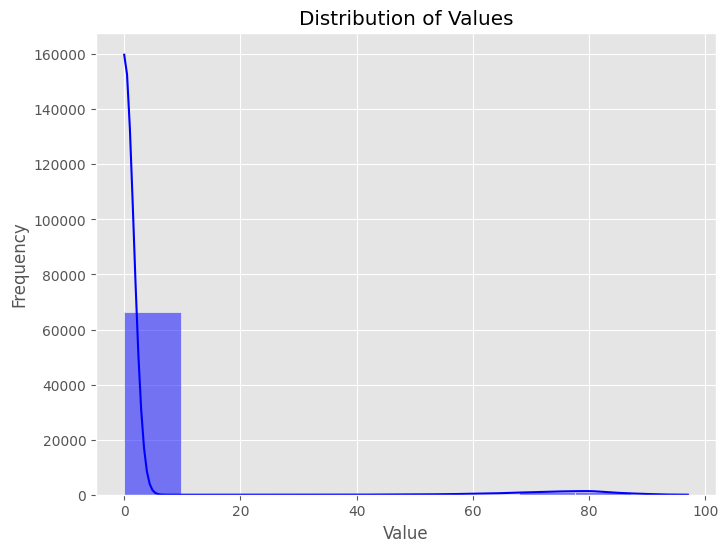

In [27]:
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
sns.histplot(data=df, x='metacritic', bins=10, kde=True, color='blue')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Steam Achievements Column

In [28]:
df['steam_achievements'].value_counts()

steam_achievements
1    36184
0    33244
Name: count, dtype: int64

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\3118855916.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='steam_achievements', palette='viridis')


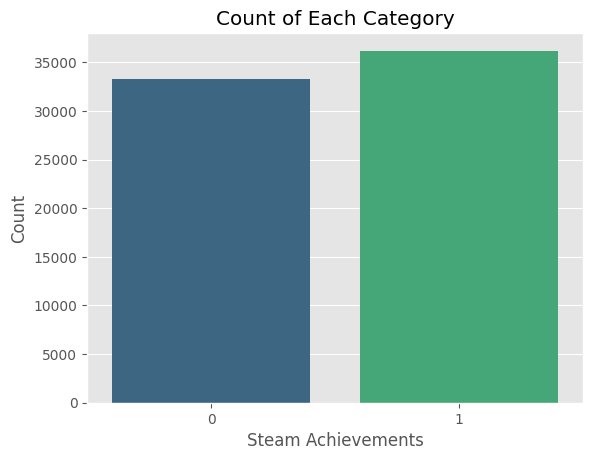

In [29]:
sns.countplot(data=df, x='steam_achievements', palette='viridis') 
plt.title('Count of Each Category')
plt.xlabel('Steam Achievements')
plt.ylabel('Count')
plt.show()

### Steam Trading Cards Column

In [30]:
df['steam_trading_cards'].value_counts()

steam_trading_cards
0    58141
1    11287
Name: count, dtype: int64

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\713712829.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='steam_trading_cards', palette='viridis')


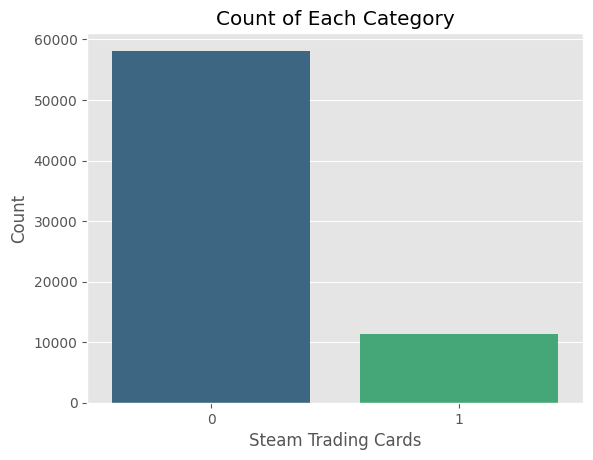

In [31]:
sns.countplot(data=df, x='steam_trading_cards', palette='viridis') 
plt.title('Count of Each Category')
plt.xlabel('Steam Trading Cards')
plt.ylabel('Count')
plt.show()

### Workshop Support Column

In [32]:
df['workshop_support'].value_counts()

workshop_support
0    62357
1     7071
Name: count, dtype: int64

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\2085910678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='workshop_support', palette='viridis')


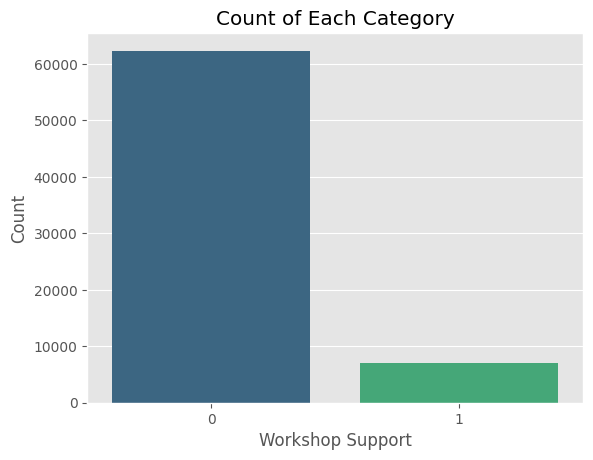

In [33]:
sns.countplot(data=df, x='workshop_support', palette='viridis') 
plt.title('Count of Each Category')
plt.xlabel('Workshop Support')
plt.ylabel('Count')
plt.show()

### Genres Column

In [34]:
df['genres'].value_counts()

genres
Casual, Indie                                                                4139
Action, Indie                                                                3470
Action, Adventure, Indie                                                     3164
Adventure, Indie                                                             2696
Adventure, Casual, Indie                                                     2228
                                                                             ... 
Casual, Free To Play, Indie, Massively Multiplayer, RPG                         1
Action, Free To Play, Indie, Massively Multiplayer, Racing, RPG, Strategy       1
Indie, Racing, RPG, Sports                                                      1
Action, Racing, RPG                                                             1
Adventure, Casual, Massively Multiplayer, Free To Play                          1
Name: count, Length: 2017, dtype: int64

In [35]:
top_10_genre=df['genres'].value_counts().head(10)

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\4169528122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genre.index, y=top_10_genre.values, palette='viridis')


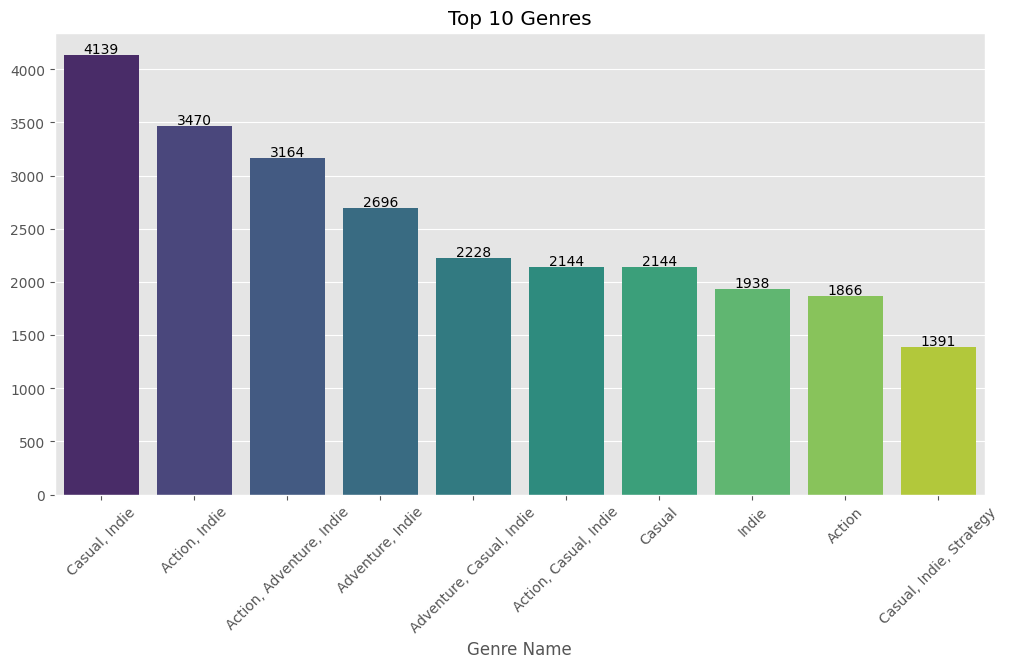

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_genre.index, y=top_10_genre.values, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Genre Name')
for i, count in enumerate(top_10_genre.values):
    plt.text(i, count + 15, str(count), ha='center')
plt.xticks(rotation=45)
plt.show()

### Achievements Total Column

In [37]:
top10ach=df['achievements_total'].value_counts().head(10)

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\3152681736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10ach.index, y=top10ach.values, palette='viridis')


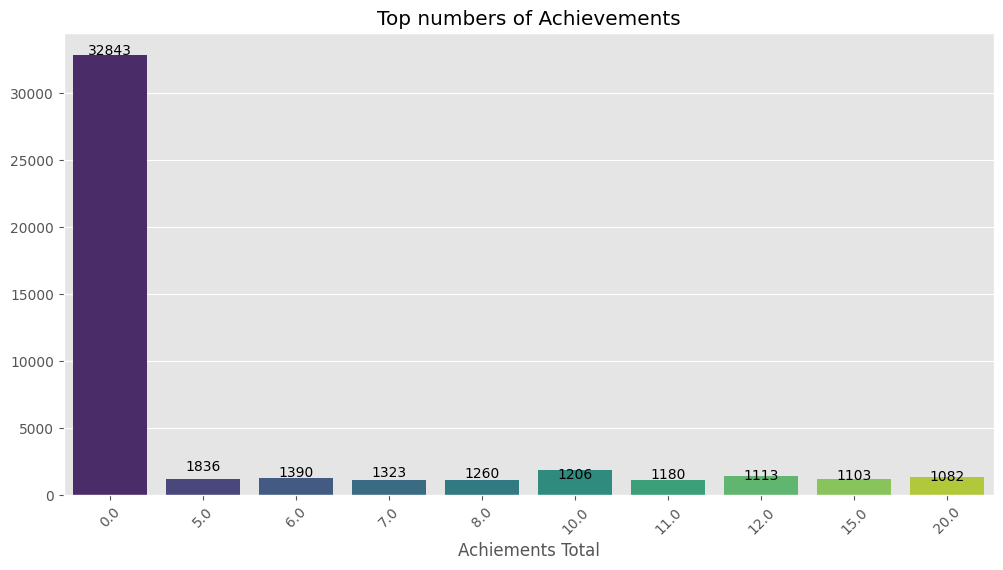

In [38]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top10ach.index, y=top10ach.values, palette='viridis')
plt.title('Top numbers of Achievements')
plt.xlabel('Achiements Total')
for i, count in enumerate(top10ach.values):
    plt.text(i, count + 15, str(count), ha='center')
plt.xticks(rotation=45)
plt.show()

### Release Date Column

In [39]:
topDate=df['release_date'].value_counts().head(10)

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\2004146647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topDate.index, y=topDate.values, palette='viridis')


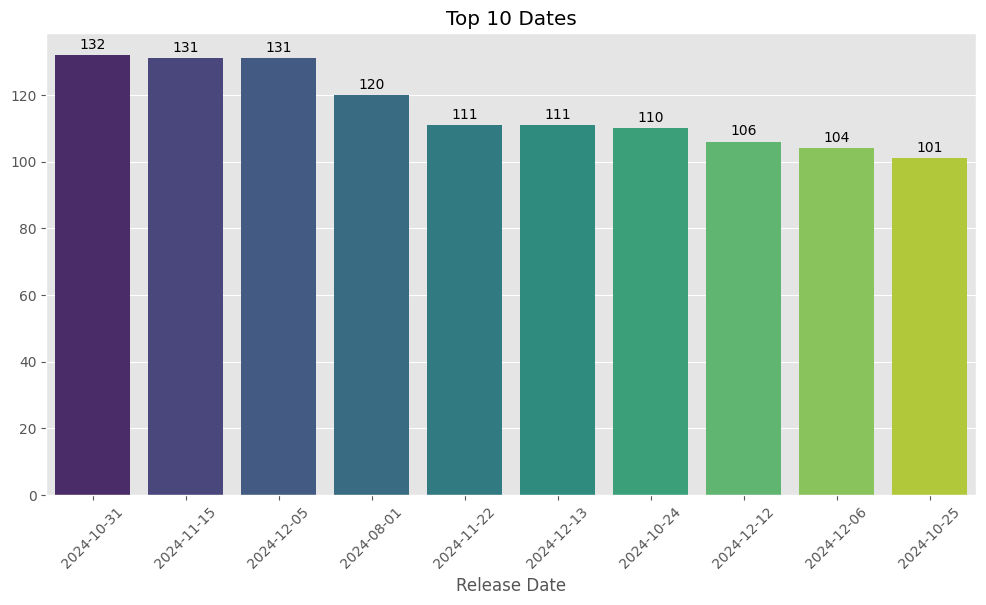

In [40]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=topDate.index, y=topDate.values, palette='viridis')
plt.title('Top 10 Dates')
plt.xlabel('Release Date')
for i, count in enumerate(topDate.values):
    plt.text(i, count + 2, str(count), ha='center')
plt.xticks(rotation=45)
plt.show()

### Price Column

- $50–$70	Normal	New AAA games
- $100	Normal (for bundles or deluxe editions)	
- $150+	Rare (big bundles, collector's editions, or mistakes)	
- $500–$1900	Not normal (real outliers)

In [41]:
df['price'].describe()

count    69428.000000
mean         7.940826
std         15.533680
min          0.000000
25%          0.990000
50%          4.990000
75%          9.990000
max       1900.000000
Name: price, dtype: float64

In [42]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(lower_bound)
print(upper_bound)

# Remove outliers
#df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

-12.51
23.490000000000002


In [43]:
df[df['price']>199.99].T

,10915,32003,34887
id,3013840,2691920,1368670
name,True Love,MolCollabo v2,Beach Volleyball Competition
metacritic,0.0,0.0,0.0
steam_achievements,0,0,0
steam_trading_cards,0,0,0
workshop_support,0,0,0
genres,"Action, Adventure, Casual, Indie",Indie,"Action, Sports"
achievements_total,0.0,0.0,0.0
release_date,2024-06-27 00:00:00,2025-02-03 00:00:00,2020-08-13 00:00:00
supported_platforms,['windows'],['windows'],"['windows', 'mac', 'linux']"


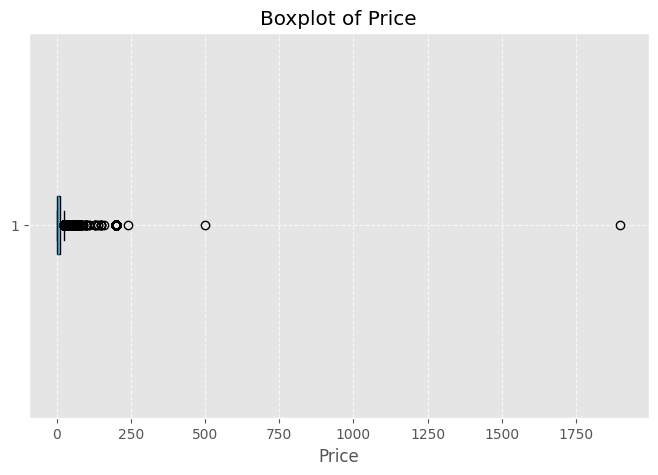

In [44]:
plt.figure(figsize=(8,5))
plt.boxplot(df.price, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- Most Steam games are between $0.99 – $19.99 normally.

- Games priced $29.99, $49.99, $59.99 (AAA games) are rare compared to indie games.

In [45]:
df[[df['publisherClass_Hobbyist'] == 1] and df['price'] > 200]

,id,name,metacritic,steam_achievements,steam_trading_cards,workshop_support,genres,achievements_total,release_date,supported_platforms,...,dlc_count,hasDemo,release_year,publisherClass_AA,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,isWindows,isMac,isLinux
10915,3013840,True Love,0.0,0,0,0,"Action, Adventure, Casual, Indie",0.0,2024-06-27,['windows'],...,0.0,0,2024.0,0,0,1,0,1,0,0
32003,2691920,MolCollabo v2,0.0,0,0,0,Indie,0.0,2025-02-03,['windows'],...,0.0,0,2025.0,0,0,1,0,1,0,0
34887,1368670,Beach Volleyball Competition,0.0,0,0,0,"Action, Sports",0.0,2020-08-13,"['windows', 'mac', 'linux']",...,0.0,1,2020.0,0,0,1,0,1,1,1


In [46]:
print((df['price'] == 0).sum())

10398


In [47]:
print((df['price'] > 0).sum())

59030


In [48]:
print((df['price'] >50 ).sum())

492


In [49]:
print((df['price'] > 70  ).sum())


241


In [50]:
df = df[df['price'] <= 70]

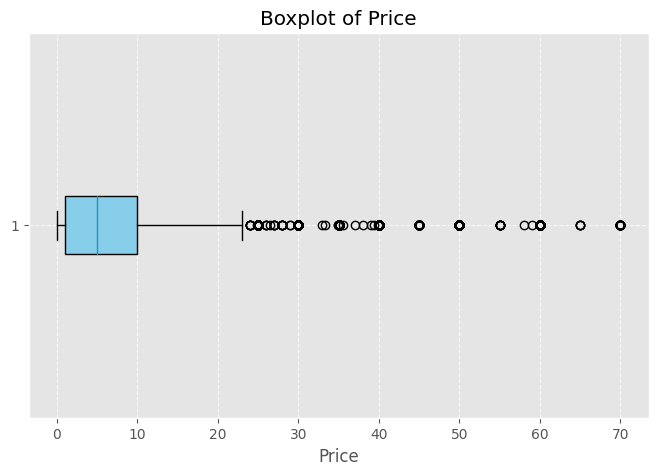

In [51]:
plt.figure(figsize=(8,5))
plt.boxplot(df.price, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69187 entries, 0 to 69427
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       69187 non-null  object        
 1   name                     69187 non-null  object        
 2   metacritic               69187 non-null  float64       
 3   steam_achievements       69187 non-null  int32         
 4   steam_trading_cards      69187 non-null  int32         
 5   workshop_support         69187 non-null  int32         
 6   genres                   69187 non-null  object        
 7   achievements_total       69187 non-null  float64       
 8   release_date             67965 non-null  datetime64[ns]
 9   supported_platforms      69187 non-null  object        
 10  price                    69187 non-null  float64       
 11  copiesSold               69187 non-null  int64         
 12  reviewScore              69187 non-nu

- most of the games are free

### Copies Sold Column

In [53]:
top10copies=df['copiesSold'].value_counts().head(10)

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\1498224905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10copies.index, y=top10copies.values, palette='viridis')


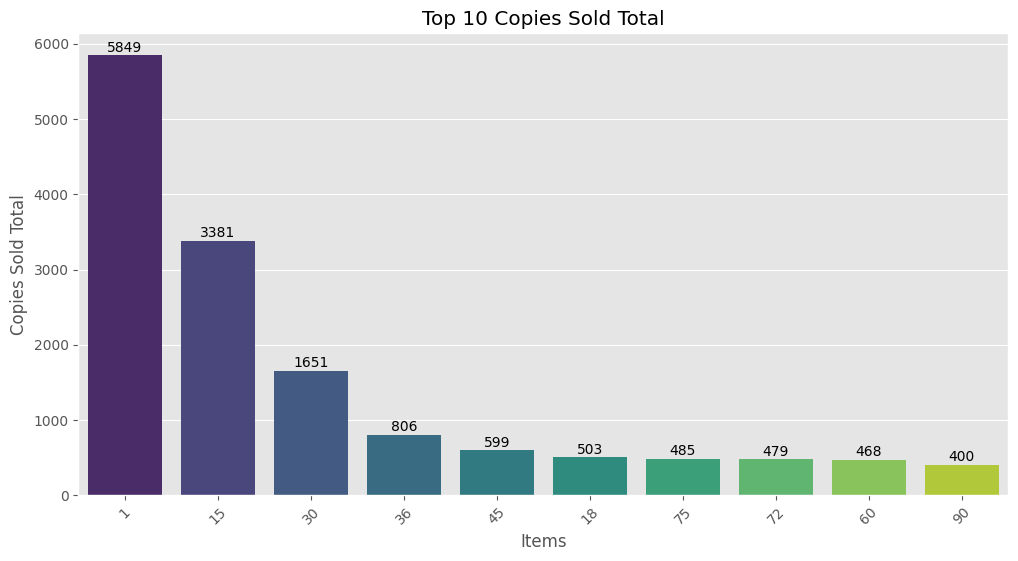

In [54]:
top10copies.index = top10copies.index.astype(str)

plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top10copies.index, y=top10copies.values, palette='viridis')
plt.title('Top 10 Copies Sold Total')
plt.xlabel('Items')   
plt.ylabel('Copies Sold Total')
plt.xticks(rotation=45)
for i, count in enumerate(top10copies.values):
    plt.text(i, count + 50, str(count), ha='center')

plt.show()

### Review Score Column

In [55]:
top10rev=df['reviewScore'].value_counts().head(10)
top10rev.index = top10rev.index.astype(str)

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\1790916413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10rev.index, y=top10rev.values, palette='viridis')


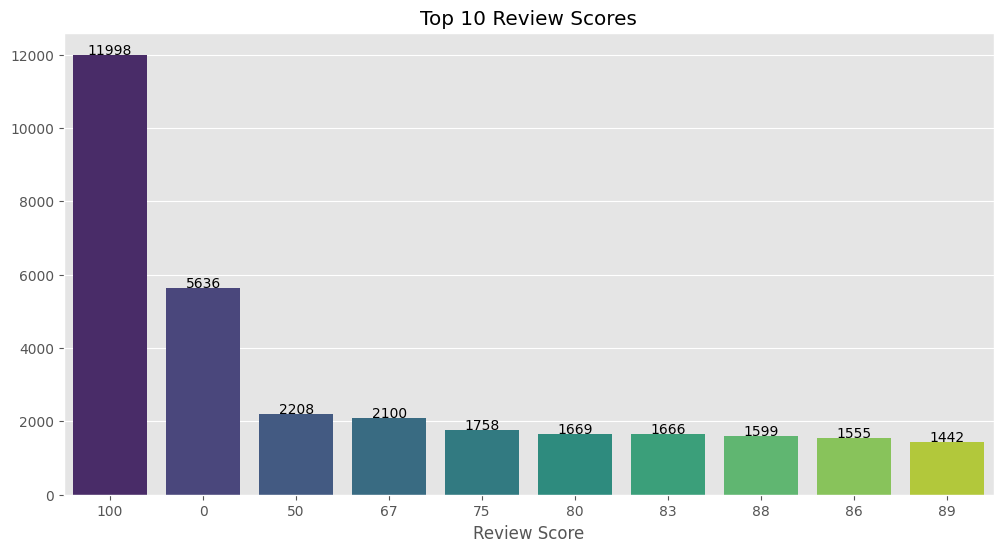

In [56]:
#Display the top 10 review scores
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top10rev.index, y=top10rev.values, palette='viridis')
plt.title('Top 10 Review Scores')
plt.xlabel('Review Score')
for i, count in enumerate(top10rev.values):
    plt.text(i, count + 15, str(count), ha='center')
plt.show()

### DLC Count Column

In [57]:
df['dlc_count'].value_counts()

dlc_count
0.0    65361
1.0     3826
Name: count, dtype: int64

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\1510813171.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dlc_count', palette='viridis')


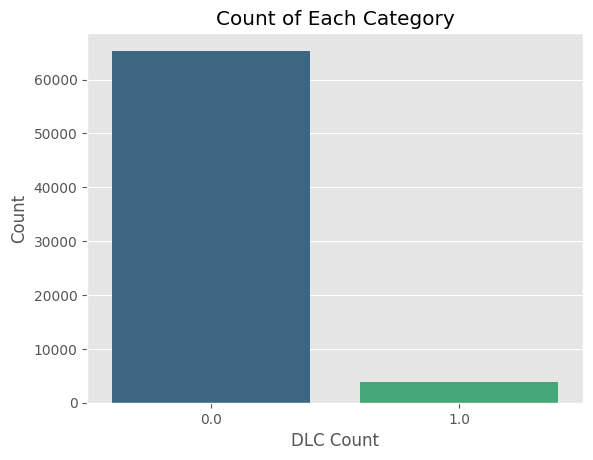

In [58]:
sns.countplot(data=df, x='dlc_count', palette='viridis') 
plt.title('Count of Each Category')
plt.xlabel('DLC Count')
plt.ylabel('Count')
plt.show()


### Has Demo Column

In [59]:
df['hasDemo'].value_counts()    

hasDemo
0    61658
1     7529
Name: count, dtype: int64

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\2161028478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hasDemo', palette='viridis')


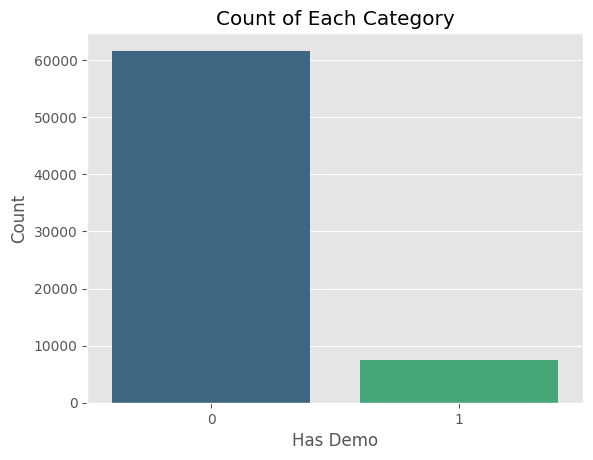

In [60]:
sns.countplot(data=df, x='hasDemo', palette='viridis') 
plt.title('Count of Each Category')
plt.xlabel('Has Demo')
plt.ylabel('Count')
plt.show()


### Release Year Column

In [61]:
top10year=df['release_year'].value_counts()
top10year.index = top10year.index.astype(str)

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\641428729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10year.index, y=top10year.values, palette='viridis')


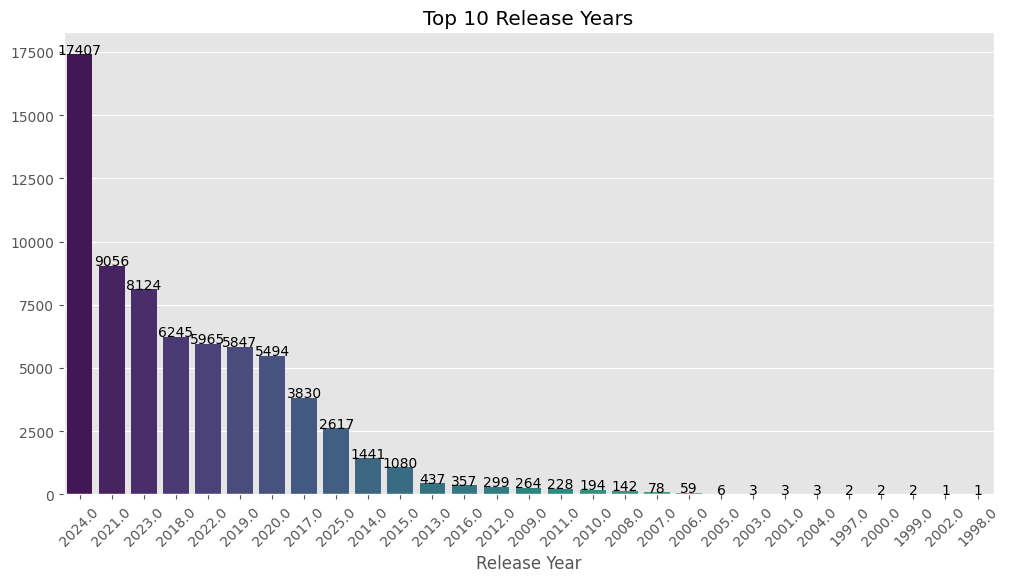

In [62]:
#Display the top 10 review scores
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top10year.index, y=top10year.values, palette='viridis')
plt.title('Top 10 Release Years')
plt.xlabel('Release Year')
for i, count in enumerate(top10year.values):
    plt.text(i, count + 15, str(count), ha='center')

plt.xticks(rotation=45)
plt.show()

- Most of the games New 

### Publisher Classes Columns

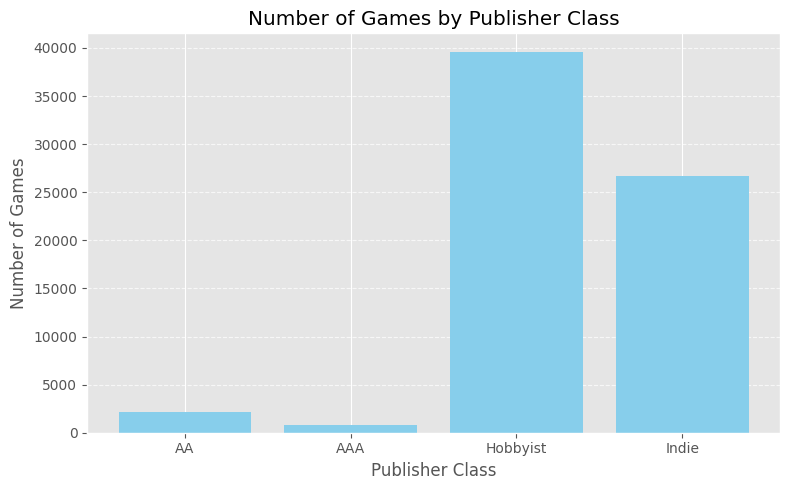

In [63]:
publisher_counts = {
    'AA': df['publisherClass_AA'].sum(),
    'AAA': df['publisherClass_AAA'].sum(),
    'Hobbyist': df['publisherClass_Hobbyist'].sum(),
    'Indie': df['publisherClass_Indie'].sum()
}
# Plot
plt.figure(figsize=(8, 5))
plt.bar(publisher_counts.keys(), publisher_counts.values(), color='skyblue')
plt.title("Number of Games by Publisher Class")
plt.xlabel("Publisher Class")
plt.ylabel("Number of Games")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Platforms Columns

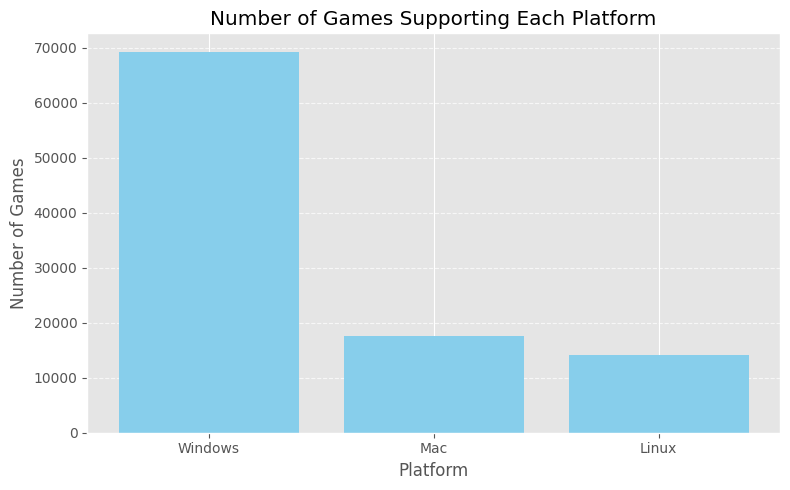

In [64]:
platform_counts = {
    'Windows': df['isWindows'].sum(),
    'Mac': df['isMac'].sum(),
    'Linux': df['isLinux'].sum()
}
# Plot
plt.figure(figsize=(8, 5))
plt.bar(platform_counts.keys(), platform_counts.values(), color='skyblue')
plt.title("Number of Games Supporting Each Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Bi-Variate Analysis**

### ***1. Group by name***

- combine name	Sum or Average of copiesSold	Find Top Selling Games

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\445868894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10copies.index, y=top10copies.values, palette='viridis')


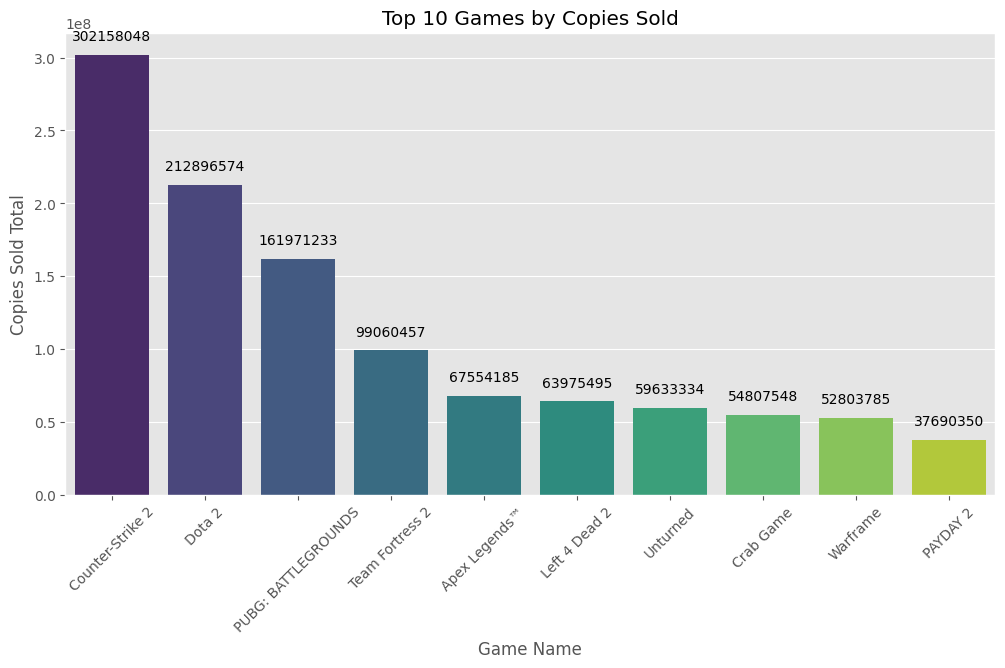

In [65]:
grouped = df.groupby('name')['copiesSold'].sum()
top10copies = grouped.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top10copies.index, y=top10copies.values, palette='viridis')
plt.title('Top 10 Games by Copies Sold')
plt.xlabel('Game Name')
plt.ylabel('Copies Sold Total')
plt.xticks(rotation=45)
for i, count in enumerate(top10copies.values):
    plt.text(i, count + 10000000, str(count), ha='center')
plt.show()

In [66]:
df.groupby('name').agg({
    'copiesSold': 'sum',
    'reviewScore': 'mean'
}).sort_values('copiesSold', ascending=False).head()

,copiesSold,reviewScore
name,,
Counter-Strike 2,302158048,87.0
Dota 2,212896574,82.0
PUBG: BATTLEGROUNDS,161971233,59.0
Team Fortress 2,99060457,90.0
Apex Legends™,67554185,67.0


### ***2. Group by release_year***

In [67]:
grouped = df.groupby('release_year').agg({
    'copiesSold': 'sum',
    'reviewScore': 'mean',
    'id': 'count'  # Number of games released that year
}).sort_values('copiesSold', ascending=False)
grouped.index = grouped.index.astype(str)

### Release Year Vs Copies sold 

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\3031985967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['copiesSold'], palette="viridis")


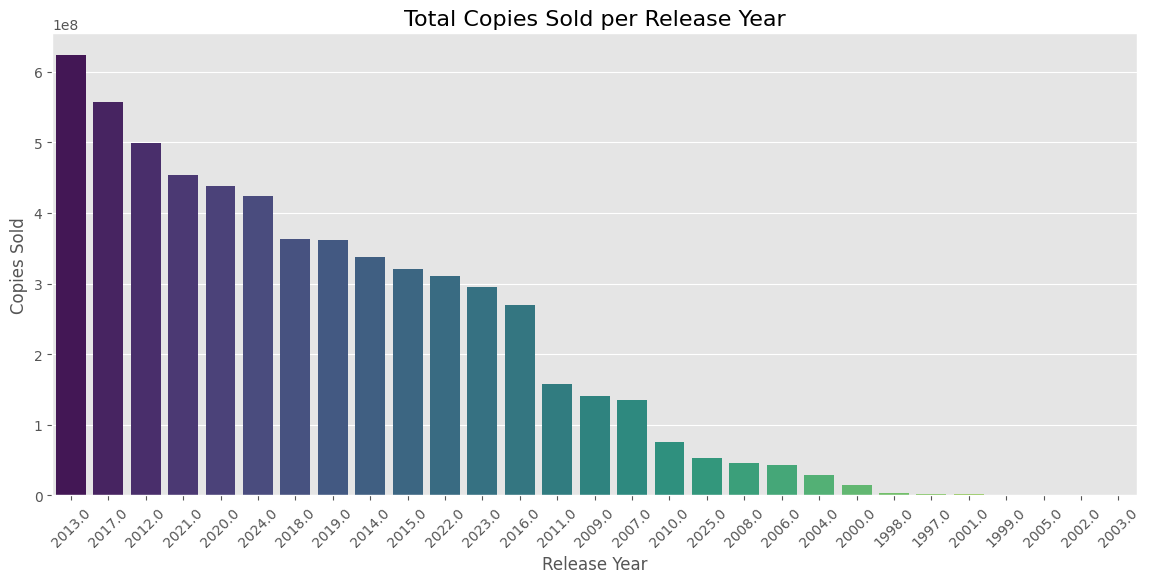

In [68]:
plt.figure(figsize=(14, 6))
sns.barplot(x=grouped.index, y=grouped['copiesSold'], palette="viridis")
plt.title('Total Copies Sold per Release Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Copies Sold')
plt.xticks(rotation=45)
plt.show()

### Release Year Vs Score

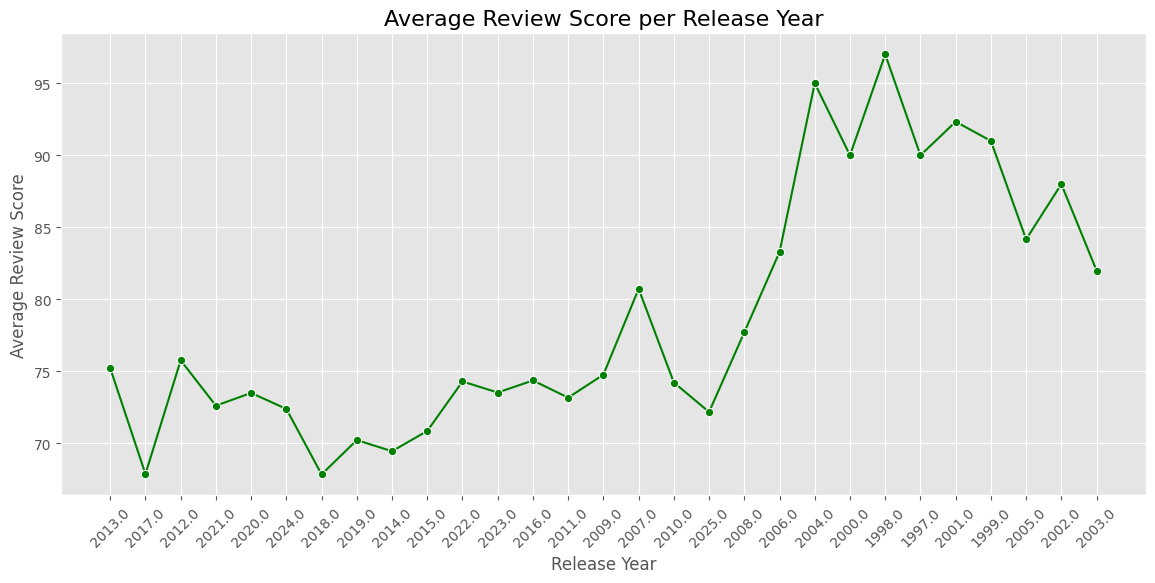

In [69]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=grouped.index, y=grouped['reviewScore'], marker='o', color='green')
plt.title('Average Review Score per Release Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ***3. Group by genres***

In [70]:
grouped = df.groupby('genres').agg({
    'copiesSold': 'sum',
    'price': 'mean',
    'reviewScore': 'mean'
}).sort_values('copiesSold', ascending=False)

### Genres Vs Copies Sold 

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\2415036726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top5.index, x=top5['copiesSold'], palette="viridis")


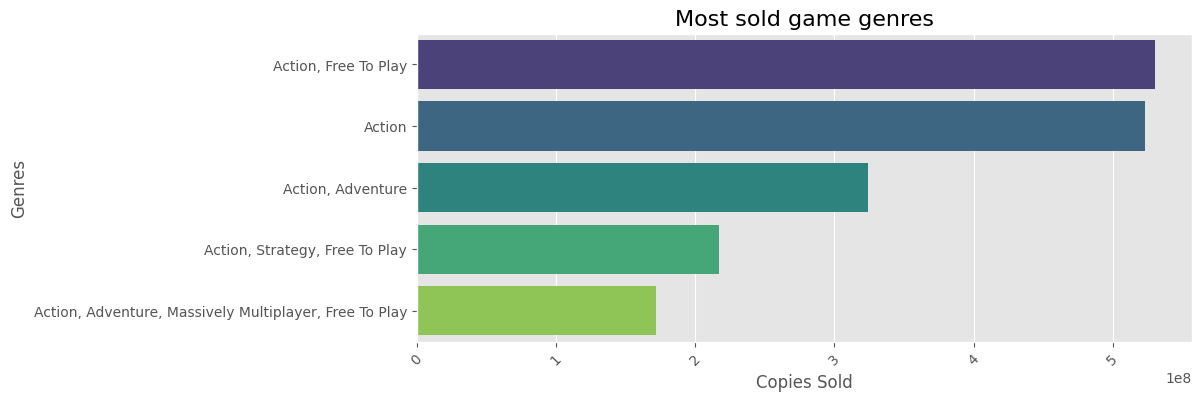

In [71]:
top5 = grouped.head()
plt.figure(figsize=(10, 4))
sns.barplot(y=top5.index, x=top5['copiesSold'], palette="viridis")
plt.title('Most sold game genres', fontsize=16)
plt.ylabel('Genres')
plt.xlabel('Copies Sold')
plt.xticks(rotation=45)
plt.show()

### Genres vs Price

C:\Users\abdel\AppData\Local\Temp\ipykernel_20232\356814120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5['price'], palette="viridis")


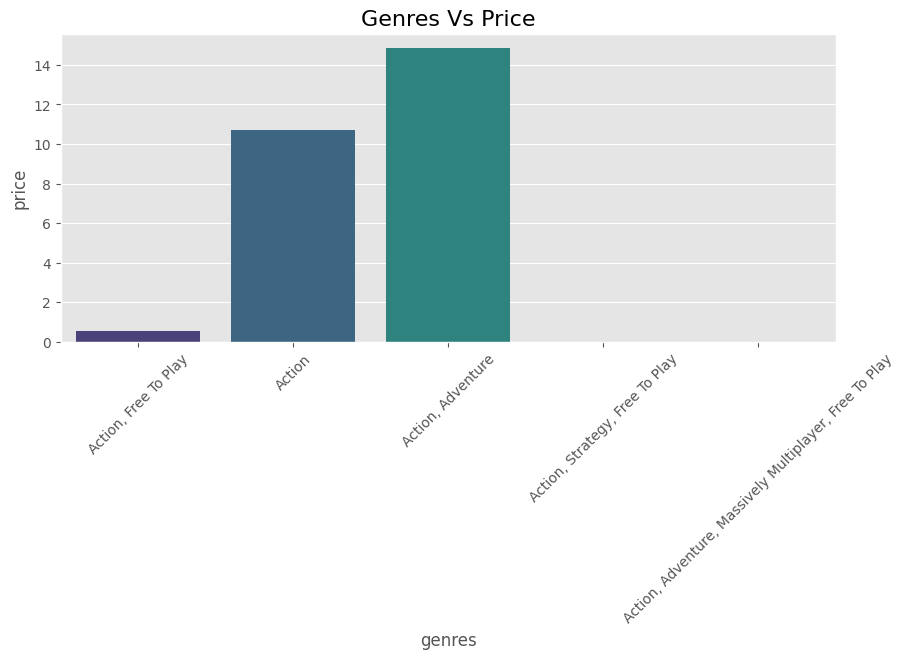

In [72]:
top5 = grouped.head()
plt.figure(figsize=(10, 4))
sns.barplot(x=top5.index, y=top5['price'], palette="viridis")
plt.title('Genres Vs Price', fontsize=16)
plt.ylabel('price')
plt.xlabel('genres')
plt.xticks(rotation=45)
plt.show()

### **Scaling** 

In [73]:
scaler = StandardScaler()
df['copiesSold'] = scaler.fit_transform(df[['copiesSold']])

---------------------------


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69187 entries, 0 to 69427
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       69187 non-null  object        
 1   name                     69187 non-null  object        
 2   metacritic               69187 non-null  float64       
 3   steam_achievements       69187 non-null  int32         
 4   steam_trading_cards      69187 non-null  int32         
 5   workshop_support         69187 non-null  int32         
 6   genres                   69187 non-null  object        
 7   achievements_total       69187 non-null  float64       
 8   release_date             67965 non-null  datetime64[ns]
 9   supported_platforms      69187 non-null  object        
 10  price                    69187 non-null  float64       
 11  copiesSold               69187 non-null  float64       
 12  reviewScore              69187 non-nu

In [75]:
df.head().T

,0,1,2,3,4
id,2574000,2574120,2573200,2569520,2567670
name,Femboy Burgers,PPA Pickleball Tour 2025,Squeaky Squad,Naturpark Lillebælt VR,A Lively Haunt
metacritic,0.0,0.0,0.0,0.0,0.0
steam_achievements,1,1,1,1,1
steam_trading_cards,1,1,1,1,1
workshop_support,1,1,1,1,1
genres,"Casual, Indie","Indie, Simulation, Sports","Action, Adventure, Indie","Action, Adventure","Adventure, Indie"
achievements_total,0.0,18.0,27.0,0.0,0.0
release_date,2023-10-09 00:00:00,2024-07-16 00:00:00,2024-03-29 00:00:00,2023-09-18 00:00:00,2023-09-07 00:00:00
supported_platforms,"['windows', 'mac', 'linux']","['windows', 'mac', 'linux']","['windows', 'mac', 'linux']","['windows', 'mac', 'linux']","['windows', 'mac', 'linux']"


# **Feature Selection**

In [76]:
features = [
    'metacritic',
    'steam_achievements',
    'steam_trading_cards',
    'workshop_support',
    'achievements_total',
    'price',
    'dlc_count',
    'copiesSold',
    'hasDemo',
    'release_year',
    'publisherClass_AA',
    'publisherClass_AAA',
    'publisherClass_Hobbyist',
    'publisherClass_Indie',
    'isWindows',
    'isMac',
    'isLinux'
]

X = df[features]
y = df['reviewScore']

# **Data Spliting** 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57,shuffle=True)

# **Modeling** 

In [78]:
models = {
    'XGBoost Regressor': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100),
    'LightGBM Regressor': lgb.LGBMRegressor(n_estimators=300, learning_rate=0.1,verbose = 0)
}

In [79]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  
    test_score = model.score(X_test, y_test)  
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Mean Squared Error': mse
    })
results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Score,Test Score,Mean Squared Error
0,XGBoost Regressor,0.403144,0.316015,553.801410
1,LightGBM Regressor,0.399459,0.340988,533.581831


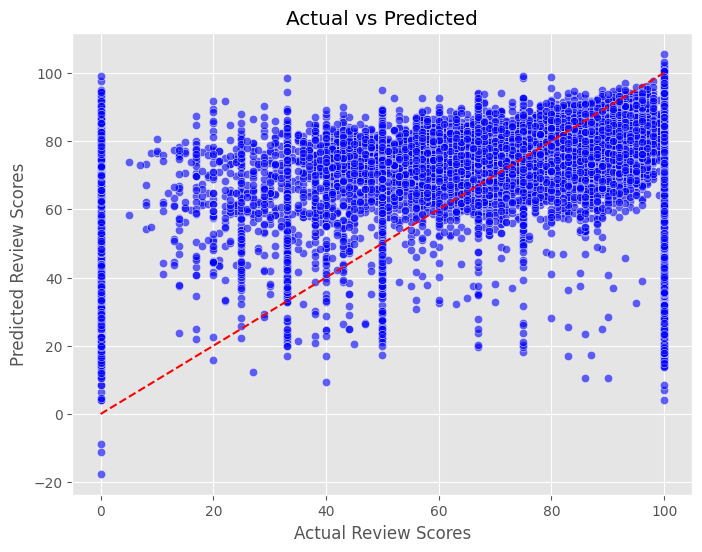

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Review Scores')
plt.ylabel('Predicted Review Scores')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

### Tried to use web Scrapping 

In [81]:
# import requests
# from bs4 import BeautifulSoup
# import re
# import json

# def scrape_steam_game(appid):
#     url = f"https://store.steampowered.com/app/{appid}/"
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/91.0.4472.124",
#         "Cookie": "birthtime=0; lastagecheckage=1-January-1970"
#     }
    
#     try:
#         response = requests.get(url, headers=headers, timeout=10)
#         response.raise_for_status()
#     except requests.RequestException as e:
#         return {"error": f"Failed to fetch page: {str(e)}"}
    
#     soup = BeautifulSoup(response.text, "html.parser")
#     result = {}
    
#     # Name
#     result["name"] = soup.find("div", class_="apphub_AppName").get_text(strip=True) if soup.find("div", class_="apphub_AppName") else None
    
#     # Metacritic
#     metacritic = soup.find("div", class_=re.compile(r"score (high|medium|low)"))
#     result["metacritic"] = int(metacritic.get_text(strip=True)) if metacritic else None
    
#     # Steam Achievements
#     result["steam_achievements"] = bool(soup.find("div", class_="game_area_achievement_stats"))
    
#     # Steam Trading Cards
#     result["steam_trading_cards"] = bool(soup.find("a", href=re.compile(r"tradingcards")))
    
#     # Workshop Support
#     result["workshop_support"] = bool(soup.find("a", href=re.compile(r"steamcommunity\.com\/app\/\d+\/workshop")))
    
#     # Genres
#     genres = [a.get_text(strip=True) for a in soup.find_all("a", class_="app_tag") if a.get_text(strip=True).lower() != "indie"]
#     result["genres"] = genres if genres else None
    
#     # Achievements Total
#     achievements = soup.find("span", class_="communitylink_achievement_count")
#     result["achievements_total"] = int(achievements.get_text(strip=True)) if achievements else None
    
#     # Release Date
#     release_date = soup.find("div", class_="release_date")
#     result["release_date"] = release_date.find("div", class_="date").get_text(strip=True) if release_date else None
    
#     # Supported Platforms
#     platforms = []
#     if soup.find("div", class_="sysreq_tab", attrs={"data-os": "win"}): platforms.append("Windows")
#     if soup.find("div", class_="sysreq_tab", attrs={"data-os": "mac"}): platforms.append("Mac")
#     if soup.find("div", class_="sysreq_tab", attrs={"data-os": "linux"}): platforms.append("Linux")
#     result["supported_platforms"] = platforms if platforms else None
    
#     # Price
#     price = soup.find("div", class_="game_purchase_price")
#     result["price"] = price.get_text(strip=True) if price else "Free"
    
#     # Copies Sold
#     result["copiesSold"] = None  # Not available on store page
    
#     # Publisher Class
#     publisher = soup.find("div", id="developers_list")
#     if publisher:
#         publisher_name = publisher.find("a").get_text(strip=True)
#         aaa_publishers = ["Valve", "Bethesda", "Rockstar", "EA", "Ubisoft", "Activision"]
#         result["publisherClass"] = "AAA" if publisher_name in aaa_publishers else "Indie"
#     else:
#         result["publisherClass"] = None
    
#     # Review Score
#     review_summary = soup.find("span", class_="game_review_summary")
#     review_percent = soup.find("span", class_="nonresponsive_hidden responsive_reviewdesc")
#     review_score = review_summary.get_text(strip=True) if review_summary else None
#     if review_percent:
#         percent = re.search(r"\d+%", review_percent.get_text(strip=True))
#         review_score += f" ({percent.group()})" if percent else ""
#     result["reviewScore"] = review_score
    
#     # AI Content
#     description = soup.find("div", class_="game_area_description")
#     result["aiContent"] = bool(description and ("ai-generated" in description.get_text(strip=True).lower() or "artificial intelligence" in description.get_text(strip=True).lower()))
    
#     # DLC App IDs
#     dlc_section = soup.find("div", class_="gameDlcBlocks")
#     dlc_appids = [a["href"].split("/")[4] for a in dlc_section.find_all("a", href=re.compile(r"store\.steampowered\.com\/app\/\d+"))] if dlc_section else None
#     result["dlc_appid"] = dlc_appids
    
#     # Demo App ID
#     demo = soup.find("a", href=re.compile(r"store\.steampowered\.com\/app\/\d+\/.*demo"))
#     result["demo_appid"] = demo["href"].split("/")[4] if demo else None
    
#     return result

# # Example usage
# if __name__ == "__main__":
#     appid = "730"  # Counter-Strike 2
#     data = scrape_steam_game(appid)
#     print(json.dumps(data, indent=2))